# Rain in Australia

## Importación de librerías 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
from sklearn import preprocessing

## Importación de datos 

In [5]:
data_dir = 'https://bit.ly/3EwlsFW'

In [7]:
df = pd.read_csv(data_dir)

## MLC4. Modelling

### MLC4.1: Train / Test Split

In [8]:
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics

#### Generación de la partición de validación 

In [9]:
dev_df = df[df['Year'] != 2016] # development = train + test
val_df = df[df['Year'] == 2016] # validation

In [10]:
dev_df_X = dev_df.drop('RainTomorrow', axis=1)
dev_df_y = dev_df[['RainTomorrow']]

In [11]:
val_df_X = val_df.drop('RainTomorrow', axis=1)
val_df_y = val_df[['RainTomorrow']]

In [12]:
dev_df_X.head().T

,0,1,2,3,4
Unnamed: 0,"1,416.00","1,417.00","1,418.00","1,419.00","1,420.00"
MinTemp,12.10,13.80,15.80,18.60,19.80
MaxTemp,34.50,33.60,36.90,40.70,43.40
Rainfall,0.00,0.00,0.00,0.00,0.00
Evaporation,-999.00,-999.00,-999.00,-999.00,-999.00
Sunshine,-999.00,-999.00,-999.00,-999.00,-999.00
WindGustSpeed,44.00,28.00,22.00,44.00,81.00
WindSpeed9am,4.00,9.00,7.00,7.00,7.00
WindSpeed3pm,22.00,11.00,11.00,24.00,11.00
Humidity9am,49.00,48.00,32.00,44.00,36.00


In [13]:
dev_df_y.head().T

,0,1,2,3,4
RainTomorrow,0,0,0,0,1


#### Random Holdout

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X 
                                        dev_df_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [15]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41435 entries, 25183 to 72844
Columns: 121 entries, Unnamed: 0 to Location_Woomera
dtypes: float64(16), int64(105)
memory usage: 38.6 MB


In [16]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17759 entries, 40910 to 24996
Columns: 121 entries, Unnamed: 0 to Location_Woomera
dtypes: float64(16), int64(105)
memory usage: 16.5 MB


### MLC4.2: Model definition

#### Import scikits

En primer lugar, será necesario importar los scikits de modelización

Para visualizar árboles, es importante tener instalado la librería graphviz

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
import graphviz

In [18]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=4, # Importante, regulará el sobreajuste
                        # min_samples_split=2,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )

In [19]:
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=4, random_state=42)

Una vez generado el árbol, podemos pasar a visualizarlo con export_graphviz.

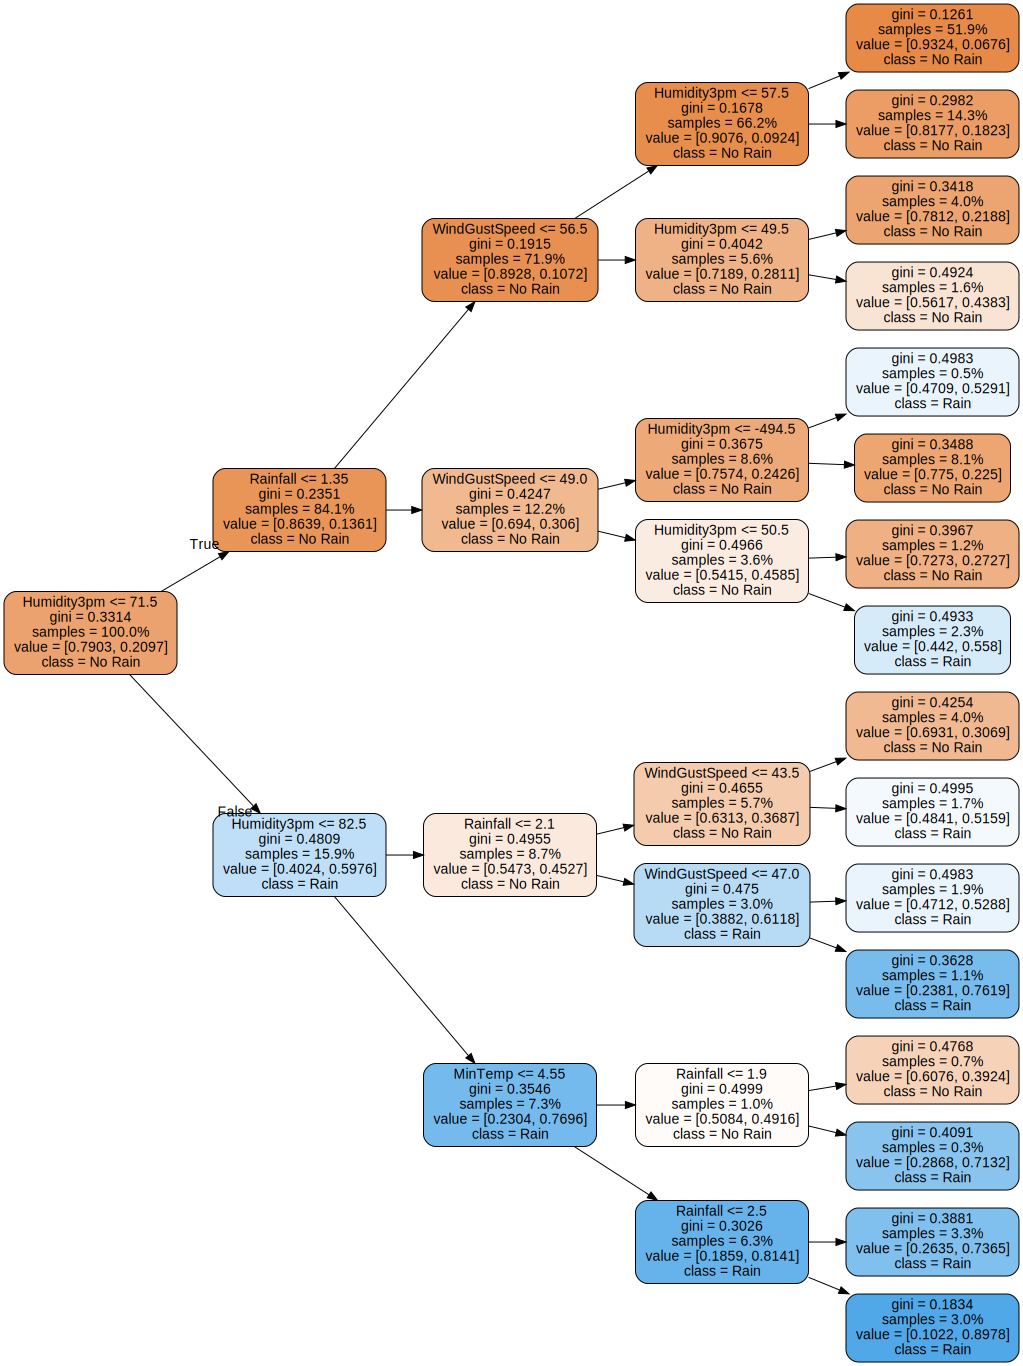

In [20]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        # out_file=None,
                        # max_depth=None,
                        feature_names=X_test.columns,
                        class_names=['No Rain', 'Rain'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

graph = graphviz.Source(dot_data)
graph

In [21]:
df_humidity3pm_not_null = df[df['Humidity3pm'] >= 0]

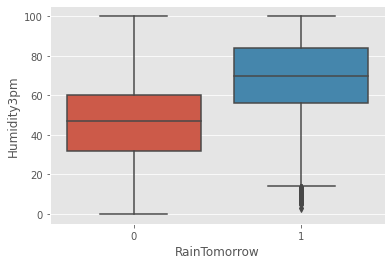

In [22]:
sns.boxplot(data=df_humidity3pm_not_null, x='RainTomorrow', y='Humidity3pm', )

### MLC4.3: Model evaluation

In [23]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['RainPrediction'])

In [24]:
y_test_pred.head()

,RainPrediction
40910,0
57031,0
3846,0
50131,0
47452,0


In [25]:
results_df = y_test.join(y_test_pred)

In [26]:
results_df.head()

,RainTomorrow,RainPrediction
40910,0,0
57031,1,0
3846,0,0
50131,0,0
47452,0,0


In [27]:
results_df['Success'] = (results_df['RainTomorrow'] == results_df['RainPrediction']).astype(int)

In [28]:
results_df.head()

,RainTomorrow,RainPrediction,Success
40910,0,0,1
57031,1,0,0
3846,0,0,1
50131,0,0,1
47452,0,0,1


In [29]:
results_df['Success'].count()

17759

In [30]:
results_df['Success'].sum()

14821

In [31]:
results_df['Success'].mean()

0.8345627569119883

In [32]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

Hemos acertado 14821 registros de un total de 17759, por tanto el Accuracy es 0.8345627569119883.


#### Opción 2: a través de la matriz de confusión

In [33]:
confusion_matrix = pd.crosstab(results_df['RainTomorrow'], results_df['RainPrediction'])

In [34]:
confusion_matrix

RainPrediction,0,1
RainTomorrow,,
0,13165,848
1,2090,1656


In [35]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [36]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.8345627569119883

#### Otro elemento interesante es evaluar el modelo de forma probabilista, obteniendo los scorings y no el valor de predicción

In [37]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index=y_test.index, columns=['RainScore'])

In [38]:
results_df = results_df.join(y_score)

In [39]:
results_df.head(10)

,RainTomorrow,RainPrediction,Success,RainScore
40910,0,0,1,0.18
57031,1,0,0,0.18
3846,0,0,1,0.07
50131,0,0,1,0.23
47452,0,0,1,0.07
43466,0,0,1,0.18
73057,1,0,0,0.18
56909,1,0,0,0.31
31886,0,0,1,0.18
68813,0,0,1,0.07


### Evaluación de modelos alternativos

Una alternativa al uso de árboles de decisión que aporta mayor precisión sin perjudicar la capacidad de generalización son los modelos de Ensamble, como Random Forest o Gradient Boosting

In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [43]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=500, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=7, min_samples_split=500, random_state=42)

In [44]:
y_score = pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index, columns=['RainScore'])

In [45]:
results_df = y_test.join(y_score)

In [46]:
results_df.head(10)

,RainTomorrow,RainScore
40910,0,0.23
57031,1,0.21
3846,0,0.12
50131,0,0.34
47452,0,0.10
43466,0,0.12
73057,1,0.30
56909,1,0.38
31886,0,0.15
68813,0,0.22
